In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
df = pd.read_csv('mbot_battery_log_2021.csv')

In [2]:
# Adjust utime to start from 0
df['utime'] = df['utime'] - df['utime'].iloc[0]

gap_threshold = 10000  # Define the gap threshold
time_diff = df['utime'].diff()  # Calculate the difference between consecutive rows

In [3]:
# Check if any time difference exceeds the threshold
if (time_diff >= gap_threshold).any():
    gap_index = time_diff[time_diff >= gap_threshold].index[0]

    # Print the rows around the identified gap for verification
    print("Before adjustment:")
    print(df.loc[max(gap_index - 10, 0):min(gap_index + 10, len(df) - 1), 'utime'])

    # Step 3: Align everything after the gap to the last data before the gap
    last_timestamp_before_gap = df.loc[gap_index - 1, 'utime']

    # Shift all timestamps after the gap to align with the last timestamp before the gap
    df.loc[gap_index:, 'utime'] = df.loc[gap_index:, 'utime'] - df.loc[gap_index, 'utime'] + last_timestamp_before_gap

    # Print the adjusted timestamps
    print("\nAfter adjustment:")
    print(df.loc[max(gap_index - 10, 0):min(gap_index + 10, len(df) - 1), 'utime'])
else:
    print("No time gaps exceeding the threshold were found.")

Before adjustment:
8254     8412.234273
8255     8413.248240
8256     8414.258802
8257     8415.272720
8258     8416.281109
8259     8417.299416
8260     8418.311763
8261     8419.325787
8262     8420.338439
8263     8420.703904
8264    69230.691460
8265    69231.704294
8266    69232.714602
8267    69233.724220
8268    69234.737556
8269    69235.755618
8270    69236.766362
8271    69237.820405
8272    69238.821983
8273    69239.843849
8274    69240.860045
Name: utime, dtype: float64

After adjustment:
8254    8412.234273
8255    8413.248240
8256    8414.258802
8257    8415.272720
8258    8416.281109
8259    8417.299416
8260    8418.311763
8261    8419.325787
8262    8420.338439
8263    8420.703904
8264    8420.703904
8265    8421.716738
8266    8422.727046
8267    8423.736664
8268    8424.750000
8269    8425.768062
8270    8426.778806
8271    8427.832849
8272    8428.834427
8273    8429.856293
8274    8430.872489
Name: utime, dtype: float64


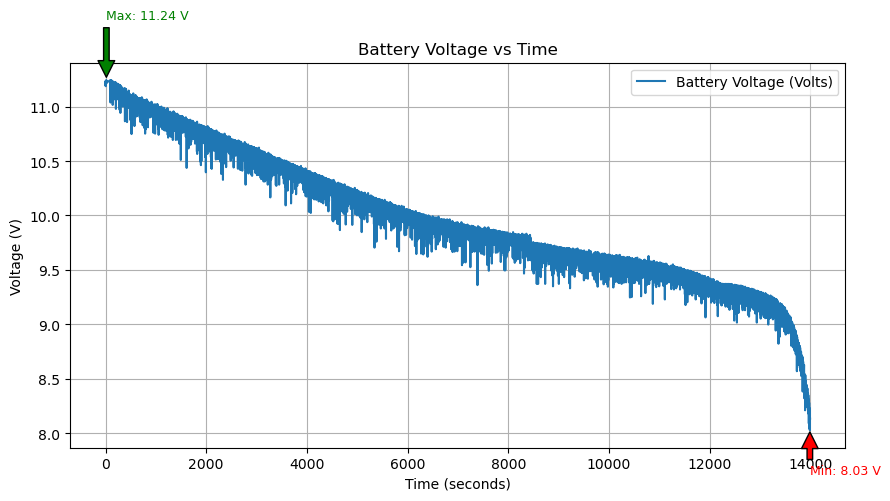

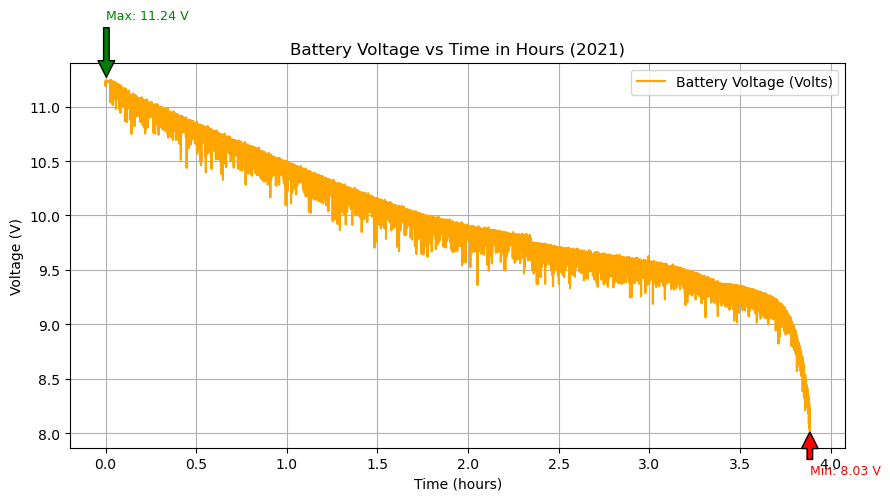

In [5]:
# Create a new column for hours after adjustment
df['hours'] = df['utime'] / 3600

# Plot the battery voltage vs time in seconds
plt.figure(figsize=(10, 5))
plt.plot(df['utime'], df['battery_voltage'], label='Battery Voltage (Volts)')

# Label the highest and lowest voltage values
max_voltage = df['battery_voltage'].max()
min_voltage = df['battery_voltage'].min()
plt.annotate(f'Max: {max_voltage:.2f} V', xy=(df['utime'][df['battery_voltage'].idxmax()], max_voltage),
             xytext=(df['utime'][df['battery_voltage'].idxmax()], max_voltage * 1.05),
             arrowprops=dict(facecolor='green', shrink=0.05), fontsize=9, color='green')
plt.annotate(f'Min: {min_voltage:.2f} V', xy=(df['utime'][df['battery_voltage'].idxmin()], min_voltage),
             xytext=(df['utime'][df['battery_voltage'].idxmin()], min_voltage * 0.95),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=9, color='red')

# Label the axes for the first plot
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (V)')

# Add a title
plt.title('Battery Voltage vs Time')

# Add a grid for better readability
plt.grid(True)

# Show the legend and plot
plt.legend()
plt.show()

# Plot the battery voltage vs time in hours
plt.figure(figsize=(10, 5))
plt.plot(df['hours'], df['battery_voltage'], label='Battery Voltage (Volts)', color='orange')

# Label the highest and lowest voltage values
plt.annotate(f'Max: {max_voltage:.2f} V', xy=(df['hours'][df['battery_voltage'].idxmax()], max_voltage),
             xytext=(df['hours'][df['battery_voltage'].idxmax()], max_voltage * 1.05),
             arrowprops=dict(facecolor='green', shrink=0.05), fontsize=9, color='green')
plt.annotate(f'Min: {min_voltage:.2f} V', xy=(df['hours'][df['battery_voltage'].idxmin()], min_voltage),
             xytext=(df['hours'][df['battery_voltage'].idxmin()], min_voltage * 0.95),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=9, color='red')

# Label the axes for the second plot
plt.xlabel('Time (hours)')
plt.ylabel('Voltage (V)')

# Add a title for the second plot
plt.title('Battery Voltage vs Time in Hours (2021)')

# Add a grid for better readability
plt.grid(True)

# Show the legend and plot
plt.legend()
plt.show()